<a href="https://colab.research.google.com/github/pedrohcaminha/projeto1DS/blob/main/projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas e dados

### Importando bibliotecas

In [1]:
import pandas as pd
import datetime

### Importando dados

In [2]:
url = 'https://raw.githubusercontent.com/pedrohcaminha/projeto1DS/main/data.csv'
data = pd.read_csv(url, sep='\t')
data.tail()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition,day
10247,8:51 PM,43 F,28 F,56 %,SSW,15 mph,0 mph,30.10 in,0.0 in,Mostly Cloudy,365
10248,9:51 PM,43 F,28 F,56 %,SW,7 mph,0 mph,30.08 in,0.0 in,Mostly Cloudy,365
10249,10:46 PM,45 F,28 F,53 %,SSW,15 mph,22 mph,30.06 in,0.0 in,Cloudy,365
10250,10:51 PM,44 F,28 F,53 %,SSW,15 mph,22 mph,30.06 in,0.0 in,Cloudy,365
10251,11:51 PM,45 F,28 F,52 %,SW,14 mph,0 mph,30.02 in,0.0 in,Cloudy,365


# Tratamento de dados faltantes

### Verificando se existem dados ausentes

In [3]:
data.isnull().sum()

Time            0
Temperature     0
Dew Point       0
Humidity        0
Wind            5
Wind Speed      0
Wind Gust       0
Pressure        0
Preciptation    0
Condition       1
day             0
dtype: int64

### Como existem poucos dados ausentes, as linhas serão removidas

In [4]:
data.shape

(10252, 11)

In [5]:
data.dropna(inplace=True)
data.shape

(10246, 11)

# Realizando correções de Tipos

### Verificando os tipos


In [6]:
data.dtypes

Time            object
Temperature     object
Dew Point       object
Humidity        object
Wind            object
Wind Speed      object
Wind Gust       object
Pressure        object
Preciptation    object
Condition       object
day              int64
dtype: object

### Corrigindo os dados de tempo

In [7]:
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 12, 31)
delta = datetime.timedelta(hours=24)

timeseries = []
last_day = 1
for index, row in data.iterrows():
  if(last_day != row['day']):
    start_date += delta
    last_day = row['day']
  timeseries.append(str(start_date) + " " + row['Time'])
data['Time'] = timeseries
data['Time'] =  pd.to_datetime(data['Time'], infer_datetime_format=True)
data.drop(columns=['day'], inplace=True)
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40 F,25 F,55 %,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40 F,26 F,58 %,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40 F,25 F,55 %,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39 F,23 F,53 %,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38 F,23 F,55 %,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de temperatura

In [8]:
Temperature = []
for index, row in data.iterrows():
  Temperature.append(int(''.join(filter(str.isdigit, row['Temperature']))))
data['Temperature'] = Temperature
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25 F,55 %,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26 F,58 %,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25 F,55 %,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23 F,53 %,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23 F,55 %,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de ponto de condensação da água

In [9]:
dew = []
for index, row in data.iterrows():
  dew.append(int(''.join(filter(str.isdigit, row['Dew Point']))))
data['Dew Point'] = dew
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,55 %,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,58 %,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,55 %,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,53 %,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,55 %,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de humidade

In [10]:
Humidity = []
for index, row in data.iterrows():
  Humidity.append(int(''.join(filter(str.isdigit, row['Humidity'])))/100)
data['Humidity'] = Humidity
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Verificando os dados de direcao do vento (nao precisa de correcao)

In [11]:
data['Wind'].value_counts()

S       1306
NE      1089
NW       872
ENE      783
W        679
SSW      648
SW       615
WNW      611
NNW      556
N        550
WSW      420
SSE      419
CALM     404
E        388
NNE      349
SE       229
ESE      199
VAR      129
Name: Wind, dtype: int64

In [12]:
data['Wind'] = data['Wind'].astype('category')

### Corrigindo os dados de velocidade do vento

In [13]:
Speed = []
for index, row in data.iterrows():
  Speed.append(int(''.join(filter(str.isdigit, row['Wind Speed']))))
data['Wind Speed'] = Speed
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de velocidade da rajada do vento

In [14]:
Gust = []
for index, row in data.iterrows():
  Gust.append(int(''.join(filter(str.isdigit, row['Wind Gust']))))
data['Wind Gust'] = Gust
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de pressao

In [15]:
Pressure = []
for index, row in data.iterrows():
  Pressure.append(int(''.join(filter(str.isdigit, row['Pressure'])))/100)
data['Pressure'] = Pressure
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24,2963.0,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22,2964.0,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28,2964.0,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0,2966.0,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23,2966.0,0.0 in,Cloudy


### Corrigindo os dados de precipitacao

In [16]:
Preciptation = []
for index, row in data.iterrows():
  Preciptation.append(int(''.join(filter(str.isdigit, row['Preciptation'])))/100)
data['Preciptation'] = Preciptation
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24,2963.0,0.0,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22,2964.0,0.0,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28,2964.0,0.0,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0,2966.0,0.0,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23,2966.0,0.0,Cloudy


### Verificando os dados de condicoes

In [17]:
data['Condition'].value_counts()

Mostly Cloudy              2829
Cloudy                     2028
Fair                       1904
Partly Cloudy              1266
Light Rain                  829
Fog                         197
Mostly Cloudy / Windy       144
Rain                        127
Light Rain / Windy          123
Light Drizzle               116
Fair / Windy                110
Partly Cloudy / Windy        84
Cloudy / Windy               75
Heavy Rain                   52
Light Snow                   38
Haze                         35
Light Rain with Thunder      31
Drizzle and Fog              28
Thunder in the Vicinity      28
T-Storm                      28
Thunder                      26
Light Snow / Windy           23
Heavy Rain / Windy           22
Rain / Windy                 21
Wintry Mix                   12
Light Drizzle / Windy        10
Snow / Windy                 10
Heavy T-Storm / Windy         8
Heavy T-Storm                 8
Snow and Sleet / Windy        7
T-Storm / Windy               5
Haze / W

In [18]:
data['Condition'] = data['Condition'].astype('category')

### Verificando os dados após as correcoes

In [19]:
data.dtypes

Time            datetime64[ns]
Temperature              int64
Dew Point                int64
Humidity               float64
Wind                  category
Wind Speed               int64
Wind Gust                int64
Pressure               float64
Preciptation           float64
Condition             category
dtype: object

# Analise de dados Univariados

## Temperatura

Descricao da temperatura

In [22]:
data['Temperature'].describe()

count    10246.000000
mean        58.203592
std         16.487466
min         15.000000
25%         45.000000
50%         57.000000
75%         73.000000
max         97.000000
Name: Temperature, dtype: float64

Temperaturas medias mensais ao longo do ano

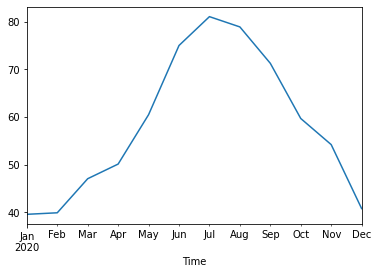

In [41]:
data.resample('M', on='Time').mean()['Temperature'].plot()

Temperaturas de acordo com os meses ao longo do ano

Time
2020-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-02-29    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: Temperature, dtype: object

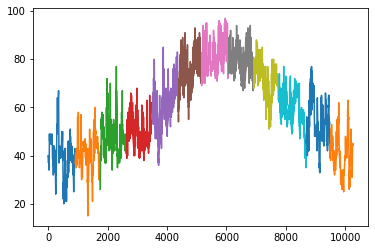

In [40]:
data.resample('M', on='Time')['Temperature'].plot()

## Dew Point

In [45]:
data['Dew Point'].describe()

count    10246.000000
mean        43.948175
std         17.607824
min          0.000000
25%         31.000000
50%         43.000000
75%         60.000000
max         75.000000
Name: Dew Point, dtype: float64